#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2020


# Spotlight on  NLTK 
#### By Harshita Chaudhary

### What is NLTK?

NLTK is a very famous Python library for working with human language data and Natural Language Proessing. It comes with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning. It provides an easy-to-use interface to a plethora of corpora and lexical resources such as WordNet. 

Website: https://www.nltk.org/ 

## 1. Basic operations using NLTK


### 1.1 Tokenizing
One of the first preprocessing operations of text data processing is tokenizing. It involves splitting up text into a list of sentences or sentences into a list of words. First, we usually remove any punctuation from the input string, then tokenize it into a list of sentences and then tokenize each sentence in the list into a list of words. Punctuations can be removed using the regex library that comes with Python using the re.sub() method.


In [95]:
import nltk
import string, re

# TOKENIZATION

def remove_punctuation(sentence):
    return re.sub(r'[^\w\s]','',sentence)

input_string = """Coronavirus cases continued to be confirmed in the United States. By following some basic steps, you can help reduce your risk, and do your part to protect others, if your community is affected. The coronavirus continues to spread in Asia, Europe and the Middle East, with more than 90 cases and six deaths confirmed in the United States. While the Food and Drug Administration announced this weekend that testing in the United States would be greatly expanded, health experts have been warning that the virus’s spread in the country is inevitable. That means it’s time to prepare your home and family in case your community is affected. Most important: Do not panic. While the outbreak is a serious public health concern, the majority of those who contract the coronavirus do not become seriously ill, and only a small percentage require intensive care."""
print("Input string:\n", input_string, "\n")

#Tokenize into a list of sentences
sentence_tokenized = nltk.tokenize.sent_tokenize(input_string)
print("Sentence tokenized:\n", sentence_tokenized, "\n")

#Remove any punctuation
sentences = [remove_punctuation(sentence) for sentence in sentence_tokenized]

#Tokenize sentences into a list of words
word_tokenized = [nltk.tokenize.word_tokenize(sentence)for sentence in sentences]
print("Word tokenized:\n", word_tokenized, "\n")


Input string:
 Coronavirus cases continued to be confirmed in the United States. By following some basic steps, you can help reduce your risk, and do your part to protect others, if your community is affected. The coronavirus continues to spread in Asia, Europe and the Middle East, with more than 90 cases and six deaths confirmed in the United States. While the Food and Drug Administration announced this weekend that testing in the United States would be greatly expanded, health experts have been warning that the virus’s spread in the country is inevitable. That means it’s time to prepare your home and family in case your community is affected. Most important: Do not panic. While the outbreak is a serious public health concern, the majority of those who contract the coronavirus do not become seriously ill, and only a small percentage require intensive care. 

Sentence tokenized:
 ['Coronavirus cases continued to be confirmed in the United States.', 'By following some basic steps, you c

### 1.2. Removing Stop words
Stop words are the words which can be filtered out while processing natural language text as they do not change the meaning of the sentence in most cases(Phrase queries being one of the exceptions). For example, commonly used words such as “the”, “a”, “an”, and “in” can be ignored while indexing entries for searching and also while retrieving the results of a search query. Removing the stop words improves efficiency as the space required to store them and the processing time is reduced. It does not affect the efficacy of text processing. The NLTK library provides a list of stopwords in 16 different languages, which can be found in the nltk_data directory.

In [96]:
# REMOVING STOP WORDS

stop_words = list(set(nltk.corpus.stopwords.words('english')))

def remove_stopwords(sentence):
    return [word for word in sentence if not word in stop_words]


filtered = [remove_stopwords(words) for words in word_tokenized]
print("Number of words before removing stopwords: ")
print(len([w for words in word_tokenized for w in words]))
print("Number of words after removing stopwords: ")
print(len([w for words in filtered for w in words]))


Number of words before removing stopwords: 
142
Number of words after removing stopwords: 
82


Result: The total number of words came down to 82 from 142, which is a pretty good reduction. In a very big scale, this has a significant impact.

### 1.3. Concordance
Concordance is a very useful tool for quick searching. It can be utilized to view all occurrences of a specific word in the word tokenized string. It also returns the text around the occurrences of the searched word to give the context of the word. The concordance method takes in a list of tokenized words. The word matching is not case sensitive.

In [97]:
from nltk.text import Text
speech_words = Text(nltk.tokenize.word_tokenize(input_string))
speech_words.concordance('coronavirus')

Displaying 3 of 3 matches:
 Coronavirus cases continued to be confirmed i
 your community is affected . The coronavirus continues to spread in Asia , Eur
ajority of those who contract the coronavirus do not become seriously ill , and


### 1.4. Parts of Speech(PoS) Tagging
Part Of Speech(POS) tagging is the method of tagging a word in a corpus to a corresponding part of a speech tag, based on its context and definition. This is not an easy and direct task, as a particular word may have a different part of speech based on the context in which the word is used. NLTK provides a method for doing this tagging (nltk.pos_tag()) which takes in a tokenized sentence and then converts each word into POS according to their grammatical function, i.e. nouns, pronouns, adjective, tense etc.

The complete tag list can be found here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

By convention in NLTK, a tagged token is represented using a tuple consisting of the token and the tag.

In [98]:
pos = [nltk.pos_tag(tokenized_sent) for tokenized_sent in word_tokenized]
pos[:3]

[[('Coronavirus', 'NN'),
  ('cases', 'NNS'),
  ('continued', 'VBD'),
  ('to', 'TO'),
  ('be', 'VB'),
  ('confirmed', 'VBN'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('United', 'NNP'),
  ('States', 'NNPS')],
 [('By', 'IN'),
  ('following', 'VBG'),
  ('some', 'DT'),
  ('basic', 'JJ'),
  ('steps', 'NNS'),
  ('you', 'PRP'),
  ('can', 'MD'),
  ('help', 'VB'),
  ('reduce', 'VB'),
  ('your', 'PRP$'),
  ('risk', 'NN'),
  ('and', 'CC'),
  ('do', 'VB'),
  ('your', 'PRP$'),
  ('part', 'NN'),
  ('to', 'TO'),
  ('protect', 'VB'),
  ('others', 'NNS'),
  ('if', 'IN'),
  ('your', 'PRP$'),
  ('community', 'NN'),
  ('is', 'VBZ'),
  ('affected', 'VBN')],
 [('The', 'DT'),
  ('coronavirus', 'NN'),
  ('continues', 'VBZ'),
  ('to', 'TO'),
  ('spread', 'VB'),
  ('in', 'IN'),
  ('Asia', 'NNP'),
  ('Europe', 'NNP'),
  ('and', 'CC'),
  ('the', 'DT'),
  ('Middle', 'NNP'),
  ('East', 'NNP'),
  ('with', 'IN'),
  ('more', 'JJR'),
  ('than', 'IN'),
  ('90', 'CD'),
  ('cases', 'NNS'),
  ('and', 'CC'),
  ('six', 'CD'),
  ('

Different corpora have a different set of tags.

One of the tagsets is the "Universal Tagset", which divides the words in 12 broad categories:

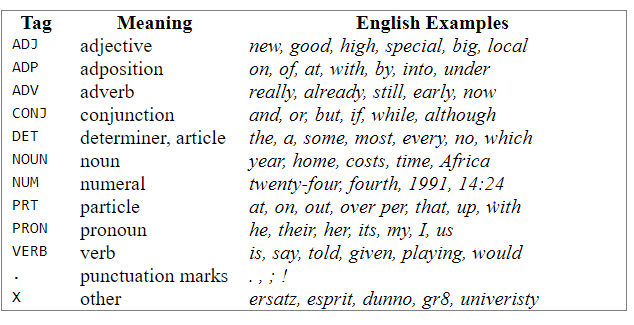


In [99]:
#Tagging using the universal taget
pos = [nltk.pos_tag(tokenized_sent, tagset='universal') for tokenized_sent in word_tokenized ]
pos[:3]

[[('Coronavirus', 'NOUN'),
  ('cases', 'NOUN'),
  ('continued', 'VERB'),
  ('to', 'PRT'),
  ('be', 'VERB'),
  ('confirmed', 'VERB'),
  ('in', 'ADP'),
  ('the', 'DET'),
  ('United', 'NOUN'),
  ('States', 'NOUN')],
 [('By', 'ADP'),
  ('following', 'VERB'),
  ('some', 'DET'),
  ('basic', 'ADJ'),
  ('steps', 'NOUN'),
  ('you', 'PRON'),
  ('can', 'VERB'),
  ('help', 'VERB'),
  ('reduce', 'VERB'),
  ('your', 'PRON'),
  ('risk', 'NOUN'),
  ('and', 'CONJ'),
  ('do', 'VERB'),
  ('your', 'PRON'),
  ('part', 'NOUN'),
  ('to', 'PRT'),
  ('protect', 'VERB'),
  ('others', 'NOUN'),
  ('if', 'ADP'),
  ('your', 'PRON'),
  ('community', 'NOUN'),
  ('is', 'VERB'),
  ('affected', 'VERB')],
 [('The', 'DET'),
  ('coronavirus', 'NOUN'),
  ('continues', 'VERB'),
  ('to', 'PRT'),
  ('spread', 'VERB'),
  ('in', 'ADP'),
  ('Asia', 'NOUN'),
  ('Europe', 'NOUN'),
  ('and', 'CONJ'),
  ('the', 'DET'),
  ('Middle', 'NOUN'),
  ('East', 'NOUN'),
  ('with', 'ADP'),
  ('more', 'ADJ'),
  ('than', 'ADP'),
  ('90', 'NUM'),


Tagged corpora is available for several other languages and are distributed with NLTK, including Chinese, Hindi, Portuguese, Spanish, Dutch, and Catalan. 

Some examples are:

In [100]:
print(nltk.corpus.indian.tagged_words())
print(nltk.corpus.sinica_treebank.tagged_words())


[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]
[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]


## 2 Chunking

Chunking is the basic technique used for entity detection. It further utilizes the POS tokens obtained using the nltk pos-tagging functionality and segments and labels multi-token sequences. This is one of the motivations for performing part-of-speech tagging in information extraction systems.

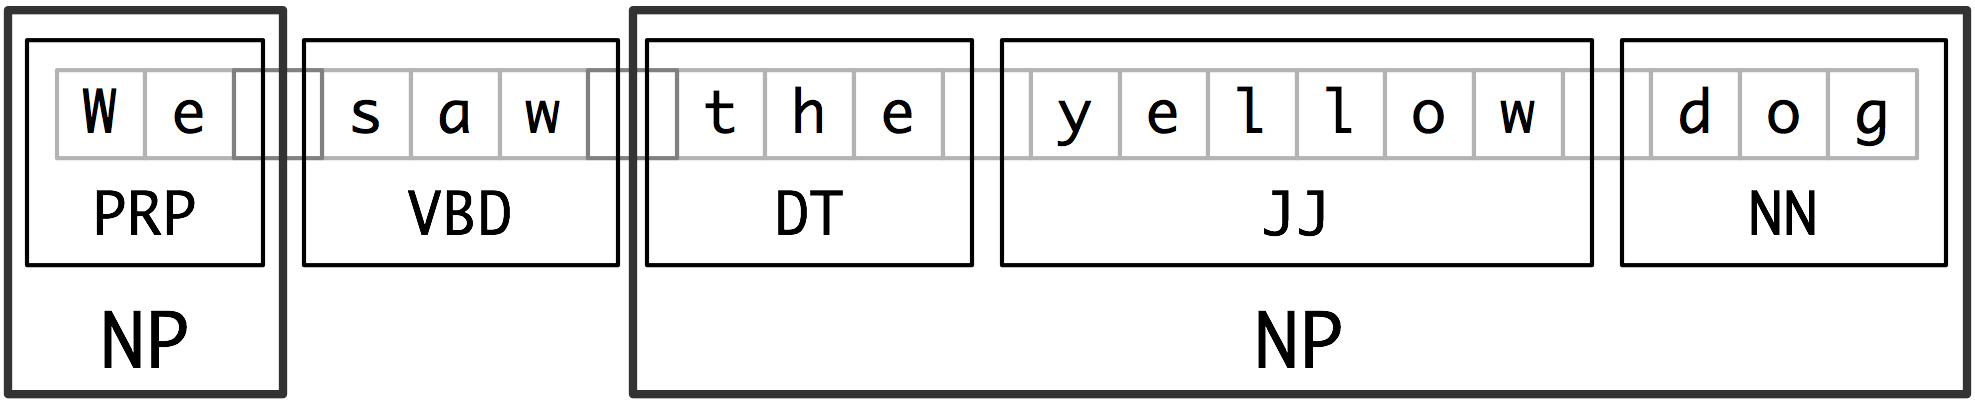

For example, take the following sentence:
"We saw the yellow dog".

Here, the words (we, saw, the, yellow, dog) are tagged individually in small boxes and show the word-level tokenization and part-of-speech tagging.

The group of words (we, the yellow dog) marked in the large boxes show higher-level chunking. Each of these larger boxes is called a chunk. Chunking, like tokenization, omits whitespace and selects a subset of the tokens. Also like tokenization, there is no overlapping of the pieces produced by a chunker with the source text.




### 2.1 Noun Phrase Chunking
Noun phrase chunking, commonly known as NP-chunking, involves searching for chunks corresponding to individual noun phrases. 

The NP-chunks are often smaller pieces than complete noun phrases. For example, in the above given example, two noun phrases are detected, "we" and "the yellow dog". 

NP chunks are often smaller pieces than complete noun phrases. For example, in the sentence "The market for system-management software for Digital's hardware is fragmented enough that a giant such as Computer Associates should do well there", the phrase "the market for system-management software for Digital's hardware" is a single noun phrase (containing two nested noun phrases), but it is captured in NP-chunks by the simpler chunk the market. One of the motives for this separation is that NP-chunks are represented so as not to contain other NP-chunks. As a result, any prepositional phrases or subordinate clauses that modify a nominal will not be incorporated in the corresponding NP chunk since they almost surely contain more noun phrases.

To create an NP-chunker, we will first define a chunk grammar or pattern. This is a simple grammar with a single regular-expression rule that indicates how sentences should be chunked. According to the rule, an NP chunk should be formed whenever the chunker finds an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN). Using this pattern, chunk parser is created, and we apply it on our preprocessed sentrence "The quick, brown fox jumped over the lazy dog". 

This parser output is a tree, which can be displayed graphically or printed.

In [101]:
sentence = "The quick, brown fox jumped over the lazy dog"

# Preprocess the text by applying word tokenization and part-of-speech tagging described in first part
def preprocess(sentence):
    sent = nltk.tokenize.word_tokenize(sentence)
    sent = nltk.pos_tag(sent)
    return sent

sentence = preprocess(sentence)

#Pattern for detecting Noun Phrase
pattern = 'NP: {<DT>?<JJ>*<NN>}'

chunk_parser = nltk.RegexpParser(pattern)
chunked_sentence = chunk_parser.parse(sentence)
print(chunked_sentence)
chunked_sentence.draw() 

(S
  (NP The/DT quick/NN)
  ,/,
  (NP brown/JJ fox/NN)
  jumped/VBD
  over/IN
  (NP the/DT lazy/JJ dog/NN))


Plotting it gives the following diagram:

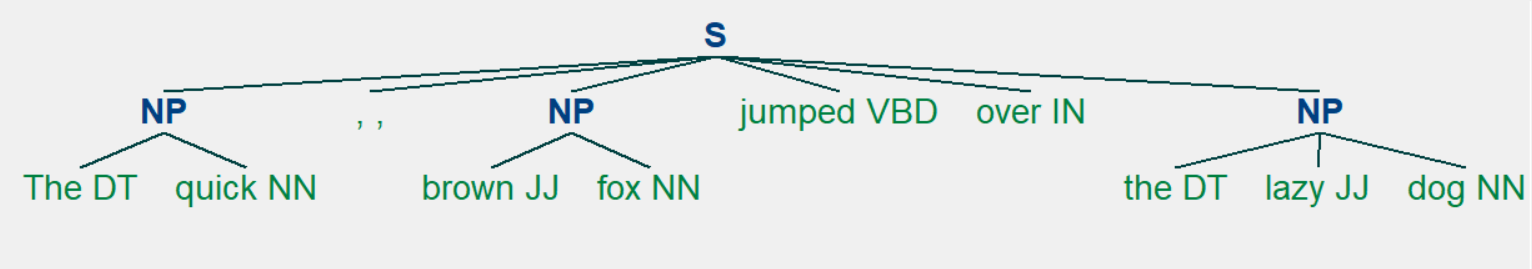


### 2.3 Chunking with multiple rules

A chunk grammar or rule can consist of two or more rules too. 

In the following example, the first rule matches one or more preposition or subordinating conjunction. The second rule matches an optional determiner or possessive pronoun, zero or more adjectives, then a noun. 


In [102]:
grammar = r"""
  P:    {<IN>+}                # chunk sequences of proper nouns
        {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
"""
chunk_parser = nltk.RegexpParser(grammar)

chunked_sentence = chunk_parser.parse(sentence)

print(chunked_sentence)
chunked_sentence.draw() 

(S
  (P The/DT quick/NN)
  ,/,
  (P brown/JJ fox/NN)
  jumped/VBD
  (P over/IN)
  (P the/DT lazy/JJ dog/NN))


Output tree displayed graphically:
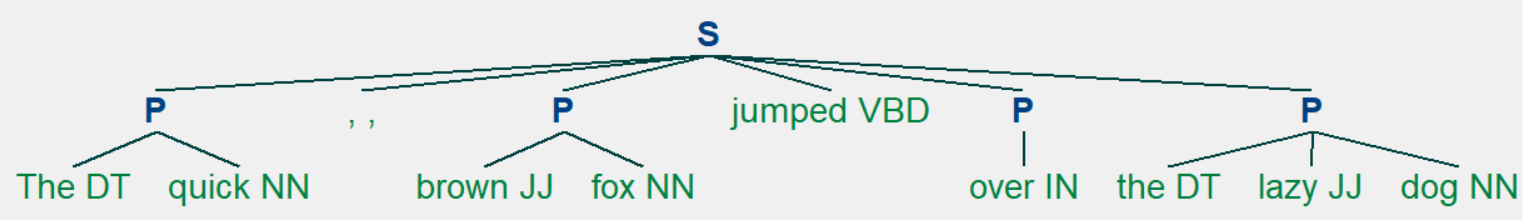

### 2.3 Exploring the chunks

Only the matched chunks can be obtained using the chunker, as follows:

In [103]:
sent = preprocess(input_string)

def find_chunks(chunk_regex, pos_chunks):
    cp = nltk.RegexpParser(chunk_regex) 
    for sentence in pos_chunks:
        tree = cp.parse(sentence)
        for subtree in tree.subtrees():
            if subtree.label() == 'CHUNK': print(subtree)
                  

find_chunks('CHUNK: {<N.*>{2,}}', pos)


(CHUNK Coronavirus/NOUN cases/NOUN)
(CHUNK United/NOUN States/NOUN)
(CHUNK Asia/NOUN Europe/NOUN)
(CHUNK Middle/NOUN East/NOUN)
(CHUNK 90/NUM cases/NOUN)
(CHUNK six/NUM deaths/NOUN)
(CHUNK United/NOUN States/NOUN)
(CHUNK Drug/NOUN Administration/NOUN)
(CHUNK United/NOUN States/NOUN)
(CHUNK health/NOUN experts/NOUN)
(CHUNK viruss/NOUN spread/NOUN)
(CHUNK health/NOUN concern/NOUN)
(CHUNK percentage/NOUN require/NOUN)


### 2.4   Chinking
Sometimes it is easier to define what we want to exclude from a chunk. We can define a chink to be a sequence of tokens that is 
A chink is a sequence of tokens that are not included in a chunk. It is used in cases when it is easier to define what we do not want in a chunk rather than what we want to include. In the following used example, "The quick, brown fox jumped over the lazy dog" if we want to exclude verb and preposition or subordinating conjunction, "barked at" becomes a chink.

Chinking will remove a sequence of tokens that match the chink pattern defined from a chunk. If the matching sequence of tokens spans an entire chunk, then the whole chunk is removed; if the sequence of tokens appears in the middle of the chunk, these tokens are removed, leaving two chunks where there was only one before. If the sequence is at the periphery of the chunk, these tokens are removed, and a smaller chunk remains. 

In [62]:
grammar = r"""
  NP:
    {<.*>+}          # Chunk everything
    }<VBD|IN>+{      # Chink sequences of VBD and IN
  """

cp = nltk.RegexpParser(grammar)

print(cp.parse(sentence))

(S
  (NP The/DT quick/NN ,/, brown/JJ fox/NN)
  jumped/VBD
  over/IN
  (NP the/DT lazy/JJ dog/NN))


### 2.5   Chunks as Tags vs Trees
The chunk structures can be represented using either tags or trees. IOB tags have become the standard way to represent chunk structures in files.  In this design, each token is tagged with one of three special chunk tags, 
1. I (inside)
2. O (outside)
3. B (begin)

The token at the beginning of a chunk is tagged as B. Succeeding tokens within the chunk are tagged I. All other tokens are tagged O. The B and I tags are suffixed with the chunk type, e.g. B-NP, I-NP. Since it is not important to define a chunk type for tokens that occur outside a chunk, these tokens are just labeled O. 

The output can be read as a tree or a hierarchy with S as the first level, denoting sentence. It can also be displayed graphically.

Meaning of the tags:

B-NP : beginning of a noun phrase

I-NP : descibes that the word is inside of the current noun phrase.

O : end of the sentence.

B-VP and I-VP : beginning and inside of a verb phrase.


Tree Representation of Chunk Structures

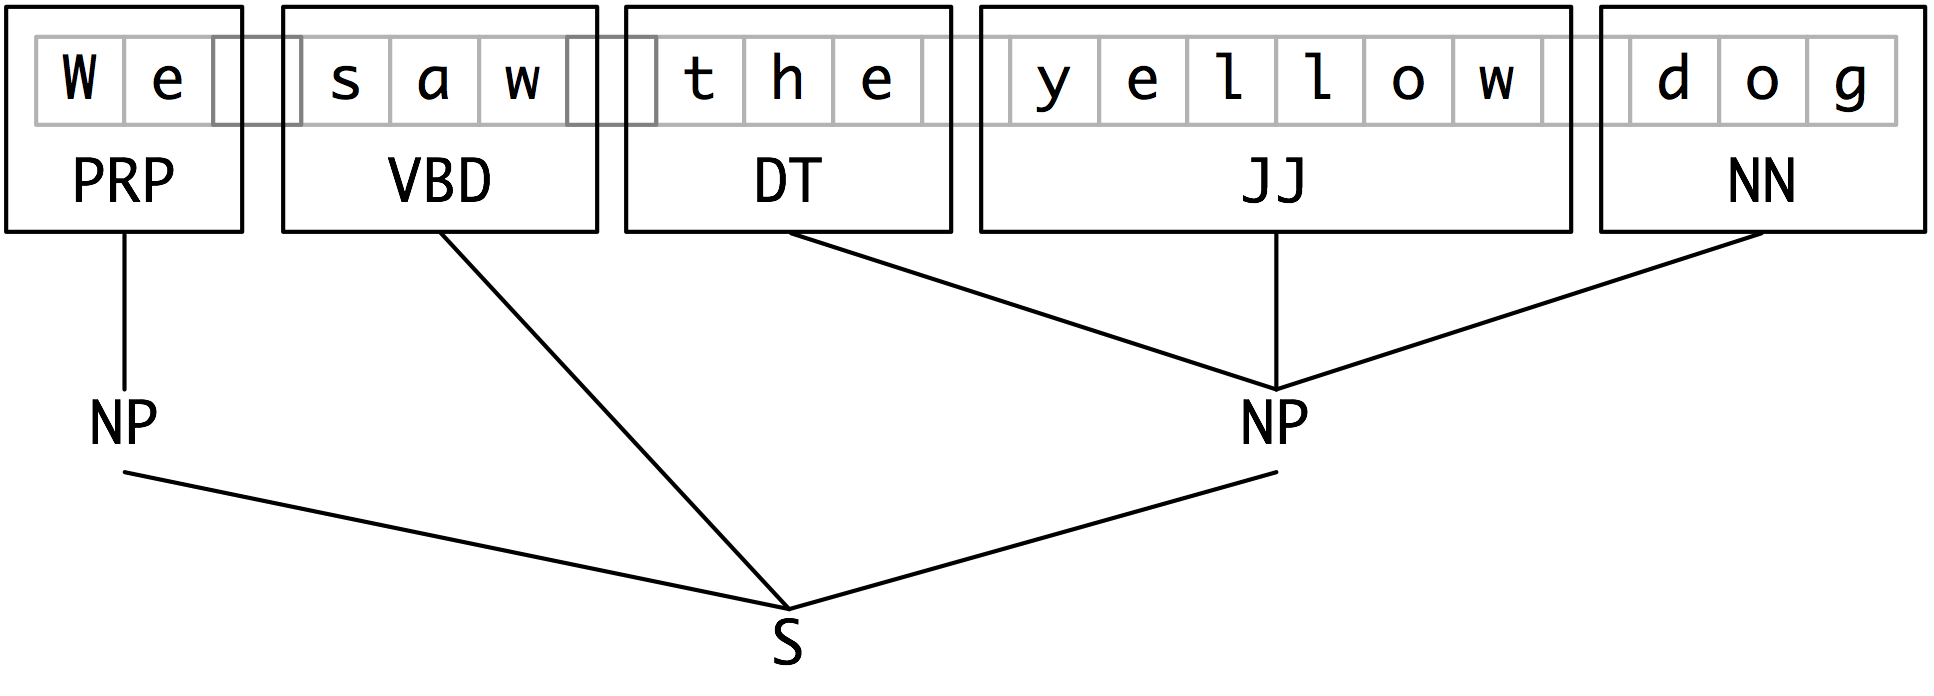

Tag Representation of Chunk Structures:

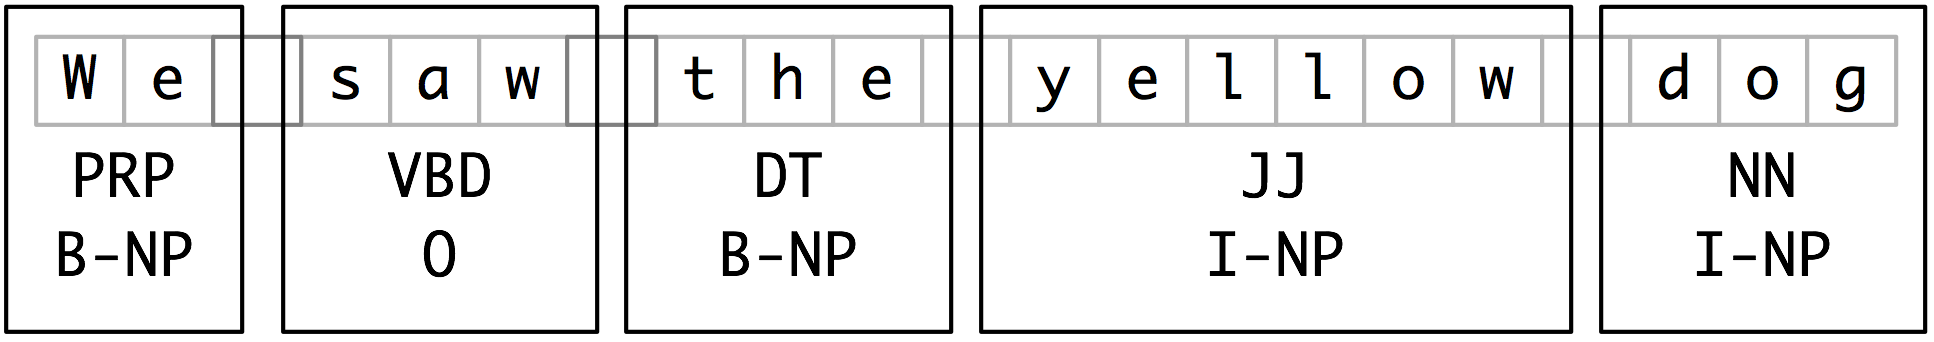



### 2.6  Switching between Tree and Tag representation of tags

The trees can be converted to CoNLL IOB tag format and vice-versa using conlltags2tree and tree2conlltags methods.


In [104]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
print("Tree representation:\n",chunked_sentence)
iob_tagged = tree2conlltags(chunked_sentence)
print("\nTag representation:")
pprint(iob_tagged)

Tree representation:
 (S
  (P The/DT quick/NN)
  ,/,
  (P brown/JJ fox/NN)
  jumped/VBD
  (P over/IN)
  (P the/DT lazy/JJ dog/NN))

Tag representation:
[('The', 'DT', 'B-P'),
 ('quick', 'NN', 'I-P'),
 (',', ',', 'O'),
 ('brown', 'JJ', 'B-P'),
 ('fox', 'NN', 'I-P'),
 ('jumped', 'VBD', 'O'),
 ('over', 'IN', 'B-P'),
 ('the', 'DT', 'B-P'),
 ('lazy', 'JJ', 'I-P'),
 ('dog', 'NN', 'I-P')]


This returns one token per line, each with its part-of-speech tag and its named entity tag. We can convert it back to a tree structure using the nltk.chunk.conlltags2tree() function to convert the tag sequences into a chunk tree.

In [105]:
print(conlltags2tree(iob_tagged))

(S
  (P The/DT quick/NN)
  ,/,
  (P brown/JJ fox/NN)
  jumped/VBD
  (P over/IN)
  (P the/DT lazy/JJ dog/NN))


## 2. Named Entity Recognition using NLTK
The volume of natural language text that is available to be processed in computerized form is tremendous and is increasing every day. But, the complexity of natural language can make it very challenging to access the information in that text. The field of NLP is still a long way from being able to build general-purpose representations of meaning from unrestricted text. Instead, if we narrow our focus and efforts on determining if a particular type of entity is present in a sentence, it would lead to meaningful results that can be further filtered using other methods.

In information extraction, a named entity is a real-world object, such as persons, locations, organizations, products, etc., that can be denoted with a proper name. It can be abstract or have a physical existence. Examples of named entities include Donald Trump, College Station, San Francisco, United States, or anything else that can be named. These entity instances are named entities. For example, San Francisco is an instance of a city, hence a named entity that can be tagged as a place(GPE).

Named entity recognition (NER) is the first step towards information extraction that attempts to find and classify named entities in text into pre-defined classes such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc. NER is used in many fields, including Information Retrieval (IR) and Natural Language Processing (NLP), and can help to answer many real-world questions, such as finding names in a news article or a tweet, particular products mentioned in reviews, locations mentioned in a social networking post or raw text. Chunking can be utilized in named-entity recognition.



With the function nltk.ne_chunk(), we can recognize named entities using a classifier, the classifier adds category labels such as PERSON, ORGANIZATION, and GPE.

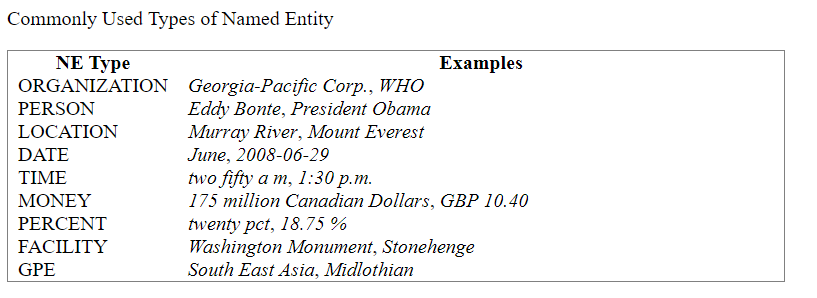


In [106]:
ne_sentence = "President Trump participates in FOX News Town Hall in Joe Biden's hometown of Scranton, Penn. following Super Tuesday."
ne_tree = nltk.ne_chunk(nltk.pos_tag(nltk.tokenize.word_tokenize(ne_sentence)))
print(ne_tree)

(S
  President/NNP
  (PERSON Trump/NNP)
  participates/VBZ
  in/IN
  (ORGANIZATION FOX/NNP News/NNP Town/NNP Hall/NNP)
  in/IN
  (PERSON Joe/NNP Biden/NNP)
  's/POS
  hometown/NN
  of/IN
  (GPE Scranton/NNP)
  ,/,
  (PERSON Penn/NNP)
  ./.
  following/VBG
  (PERSON Super/NNP)
  Tuesday/NNP
  ./.)


## 3. Chatbots using NLTK

### 3.1 Creating a Chatbot

NLTK can be used to build chatbots using the 'nltk.chat.util' package. 

Two functionalities used for this are:

1. Chat: This contains the logic that is used by the chatbot.


2. Reflections: This is a dictionary that contains a set of input values and its corresponding output values. It is an optional dictionary that you can use. You can also create your own dictionary in the same format as below and use it in your code.

In [89]:
from nltk.chat.util import Chat, reflections
pairs = [
    [
        r"my name is (.*)",
        ["Hi %1, How are you doing today ?",]
    ],
     [
        r"what is your name ?",
        ["My name is Corona and I'm a virus. Just kidding, I'm a chatbot. Are you one too?",]
    ],
    [
        r"how are you ?",
        ["I'm fine\nHow you doin?",]
    ],
    [
        r"sorry (.*)",
        ["Its alright",
         "Its OK",
         "Never mind,it's OK",]
    ],
    [
        r"i'm (.*) doing good",
        ["Nice to hear that",
         "Alright",
         "Cool",]
    ],
    [
        r"hi|hey|hello",
        ["Hello",
         "Hey there",
         "Hi",]
    ],
    [
        r"(.*) age?",
        ["I'm ageless.",
         "Why you are asking me this?",
         "Sorry, can't answer",]
        
    ],
    [
        r"what (.*) want ?",
        ["I want to have some fun",
         "I want to relax",
         "I want to sleep",]
        
    ],[
    
        r"(.*) (location|city) ?",
        ['College Station',]
    ],
    [
        r"how is weather in (.*)?",
        ["Awesome like always",
         "Too hot",
         "Too cold man here in %1"]
    ],
    [
        r"quit",
        ["Bye",
         "Take care.",
         " See you soon"]
],
]

chat = Chat(pairs, reflections)

In [92]:
chat.converse()


>Hey
Hi
>How are you?
I'm fine
How you doin?
>What is your name?
My name is Corona and I'm a virus. Just kidding, I'm a chatbot. Are you one too?
>What do you want?
I want to relax
>Bye
None
>quit
 See you soon


### 3.2 Included chatbots 

The NLTK library comes with some ready-to-use simple chatbots. These perform simple pattern matching on sentences typed by users, and respond with automatically generated sentences.

Some of them are eliza, iesha, and rude.

They can be dirctly run using the demo() method


In [93]:
nltk.chat.eliza.demo()

Therapist
---------
Talk to the program by typing in plain English, using normal upper-
and lower-case letters and punctuation.  Enter "quit" when done.
Hello.  How are you feeling today?
>Good
I see.
>How are you?
How do you suppose?
>nice
How does that make you feel?
>Okay
Why do you say that okay?
>Bye
Can you elaborate on that?
>quit
Thank you for talking with me.


In [94]:
nltk.chat.rude.demo()

Talk to the program by typing in plain English, using normal upper-
and lower-case letters and punctuation.  Enter "quit" when done.
I suppose I should say hello.
>Hello
'Hello'? How original...
>How are you?
I'm not even going to dignify that with an answer.
>Okay
I'm getting bored here. Become more interesting.
>What are you doing?
Figure it out yourself.
>Okat
Change the subject before I die of fatal boredom.
>
>Bye
Change the subject before I die of fatal boredom.
>quit
Either become more thrilling or get lost, buddy.
